In [1]:
from selenium import webdriver
import time
from bs4 import BeautifulSoup
import pandas as pd
import re
import konlpy
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

#앞에서 했던거랑 같음
def get_tags(text, ntags=50):
    spliter = Okt()
    nouns = spliter.nouns(text)
    count = Counter(nouns)
    return dict(count.most_common(ntags))

#앞에서 했던거랑 같음
def Wordcloud(data , savename , maskname=''):
    
    if maskname == '':
        wc = WordCloud( font_path='./font/BMEULJIROTTF.ttf' , background_color='white', max_font_size=60, colormap='spring')
    else:
        maskimg = np.array(Image.open(maskname))
        wc = WordCloud(font_path='./font/BMEULJIROTTF.ttf' , background_color='white', mask=maskimg, max_font_size=60, colormap='spring')
        
    wc.generate_from_frequencies(data)
    plt.figure(figsize=(20,10))
    plt.imshow(wc)
    plt.tight_layout(pad=0)
    plt.axis('off')
    plt.show()
    wc.to_file(savename + ".png")
    
#처음에 함수를 불러올 때 url을 넣어준다.
def get_googleplay(url,filename):
   
    driver = webdriver.Chrome('chromedriver.exe')
    driver.implicitly_wait(1)
    driver.get(url)
    driver.maximize_window()
    time.sleep(3)


    for i in range(0,10):
        sheight = (driver.execute_script("return document.body.scrollHeight"))     #스크롤바의 시작지점
        driver.execute_script("window.scrollTo(0,document.body.scrollHeight);")    #스크롤바를 화면 밑으로 내림
        time.sleep(2)
        lastheight = (driver.execute_script("return document.body.scrollHeight"))  #현재 스크롤바 위치 저장

        
        if sheight == lastheight:
            try:
                driver.find_element_by_class_name('CwaK9').click()
                time.sleep(2)
            except:
                print('더보기 없음')
#여기까지는 같고 밑에서부터 조금 다름

    #driver.page_source를 하면 현재 열려있는 페이지의 html 주소를 받아온다.
    html = driver.page_source    
    #슬라이싱해서 soup에 담아놓기
    soup = BeautifulSoup(html,'lxml')
    #구글플레이 댓글에서 찾아보면 bN97Pc 이게 댓글임
    result = soup.find_all('span',{'jsname':'bN97Pc'})
    
    #전체 데이터를 담을 준비
    replydata = []
    #하나씩 꺼내서 특수문자랑 영어 날리고 다시 담는다.
    for temp in result:
        hangul = re.compile('[^ ㄱ-ㅎ|가-힣]+')
        rtext = hangul.sub(r' ',temp.text)
        replydata.append(rtext)
    
    #데이터프레임으로 만들어준다.
    rdata = pd.DataFrame(replydata)
    rdata.to_csv(filename+ ' 구글플레이 댓글.csv')
    
    #이어쓰기 할 준비
    rtext = ''
    #이어쓰기 시작
    for temp in replydata:
        rtext = rtext + temp

    #태그를 100개로 달아준다.
    resulttext = get_tags(rtext,100)
    #워드클라우드 실행
    Wordcloud(resulttext, filename+' 구글플레이 워드클라우드.png')

    

더보기 없음


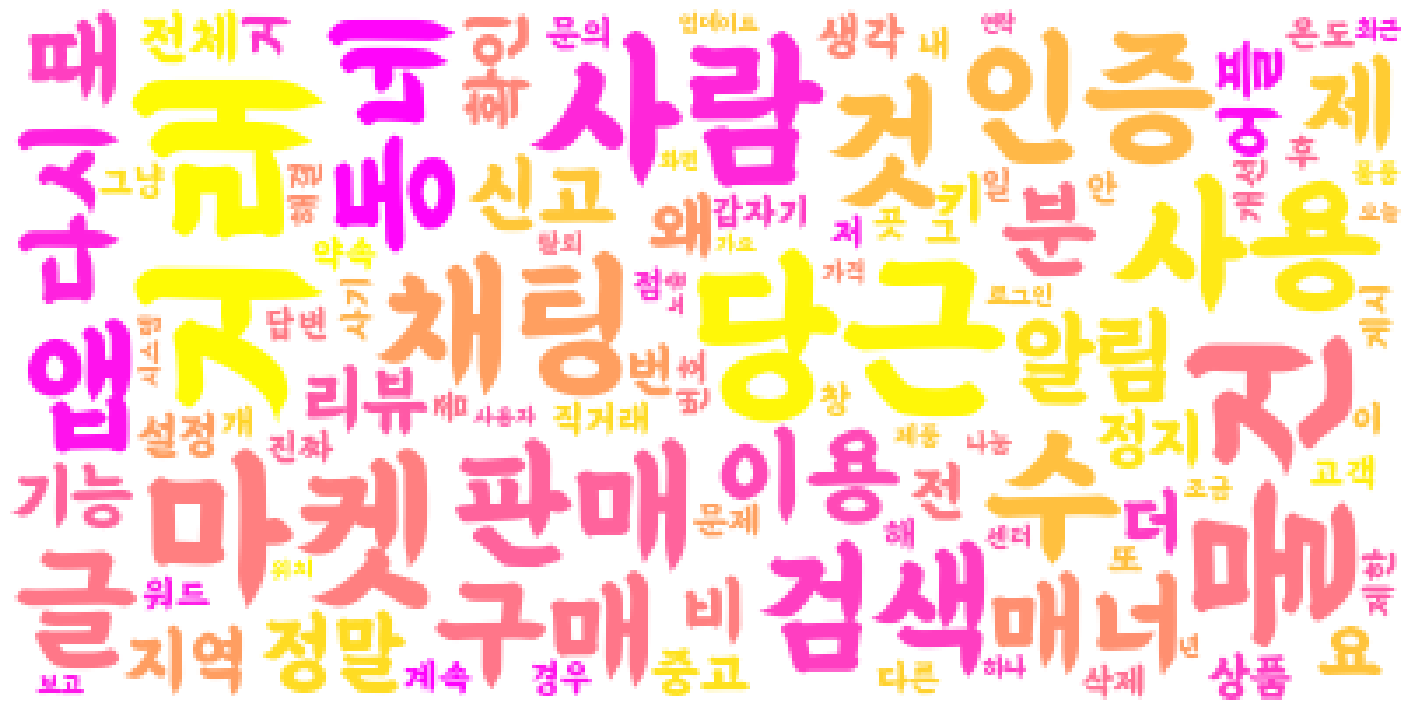

In [2]:
get_googleplay('https://play.google.com/store/apps/details?id=com.towneers.www&showAllReviews=true','당근마켓')